In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [110]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [6]:
datasets.FashionMNIST??

Init signature:
datasets.FashionMNIST(
    root: str,
    train: bool = True,
    transform: Optional[Callable] = None,
    target_transform: Optional[Callable] = None,
    download: bool = False,
) -> None
Source:        
class FashionMNIST(MNIST):
    """`Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.

    Args:
        root (string): Root directory of dataset where ``FashionMNIST/raw/train-images-idx3-ubyte``
            and  ``FashionMNIST/raw/t10k-images-idx3-ubyte`` exist.
        train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
            otherwise from ``t10k-images-idx3-ubyte``.
        download (bool, optional): If True, downloads the dataset from the internet and
            puts it in root directory. If dataset is already downloaded, it is not
            downloaded again.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g,

In [152]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

batch = 0
for X, y in iter(test_dataloader):
    # print(f"Shape of X [N, C, H, W]: {X.shape}")
    # print(f"Shape of y: {y.shape} {y.dtype}")
    batch += 1

In [153]:
(batch-1) * batch_size + 16

10000

In [147]:
dir(test_dataloader)

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_is_protocol',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'pin_memory_device',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']

In [142]:
X, y = next(iter(test_dataloader))
display(y)
X, y = next(iter(test_dataloader))
display(y)

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5])

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5])

In [10]:
import matplotlib.pyplot as plt

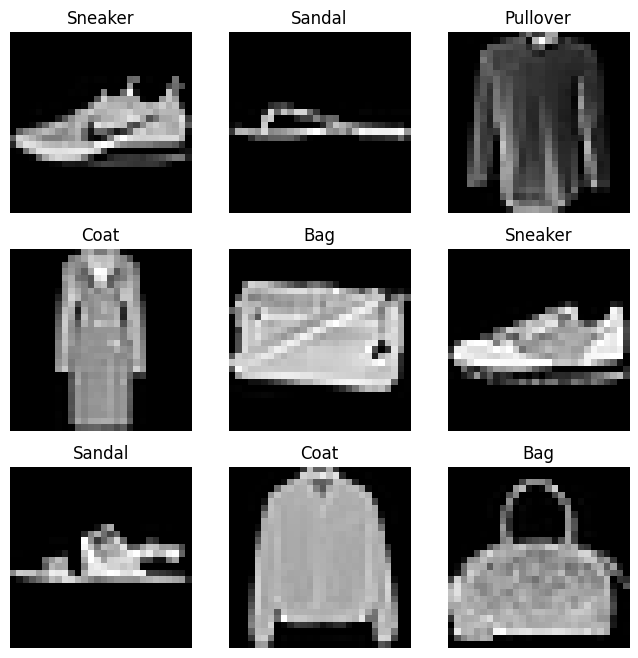

In [20]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

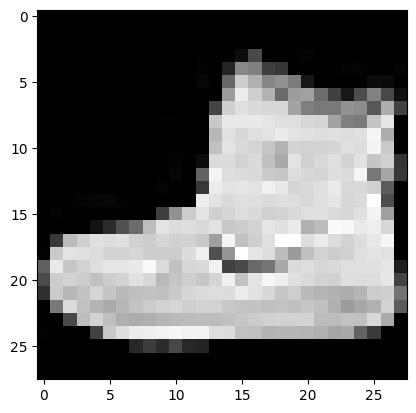

In [19]:
img, label = training_data[0]
plt.imshow(img.reshape(28, 28), cmap="gray")

In [36]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [37]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [38]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [39]:
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

In [40]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [41]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306681  [   64/60000]
loss: 2.289425  [ 6464/60000]
loss: 2.278539  [12864/60000]
loss: 2.276186  [19264/60000]
loss: 2.248535  [25664/60000]
loss: 2.227499  [32064/60000]
loss: 2.242294  [38464/60000]
loss: 2.204729  [44864/60000]
loss: 2.198657  [51264/60000]
loss: 2.171935  [57664/60000]
Test Error: 
 Accuracy: 37.6%, Avg loss: 2.164492 

Epoch 2
-------------------------------
loss: 2.176881  [   64/60000]
loss: 2.164798  [ 6464/60000]
loss: 2.114880  [12864/60000]
loss: 2.127690  [19264/60000]
loss: 2.078833  [25664/60000]
loss: 2.024661  [32064/60000]
loss: 2.058640  [38464/60000]
loss: 1.978490  [44864/60000]
loss: 1.978887  [51264/60000]
loss: 1.916040  [57664/60000]
Test Error: 
 Accuracy: 53.8%, Avg loss: 1.909851 

Epoch 3
-------------------------------
loss: 1.949412  [   64/60000]
loss: 1.916593  [ 6464/60000]
loss: 1.805629  [12864/60000]
loss: 1.837477  [19264/60000]
loss: 1.745878  [25664/60000]
loss: 1.693862  [32064/600

In [51]:
test_dataloader.__dict__

{'dataset': Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor(),
 'num_workers': 0,
 'prefetch_factor': None,
 'pin_memory': False,
 'pin_memory_device': '',
 'timeout': 0,
 'worker_init_fn': None,
 '_DataLoader__multiprocessing_context': None,
 '_dataset_kind': 0,
 'batch_size': 64,
 'drop_last': False,
 'sampler': <torch.utils.data.sampler.SequentialSampler at 0x7fb2da0e06d0>,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x7fb2da089b20>,
 'generator': None,
 'collate_fn': <function torch.utils.data._utils.collate.default_collate(batch)>,
 'persistent_workers': False,
 '_DataLoader__initialized': True,
 '_IterableDataset_len_called': None,
 '_iterator': None}

In [56]:
import math
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
b

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)

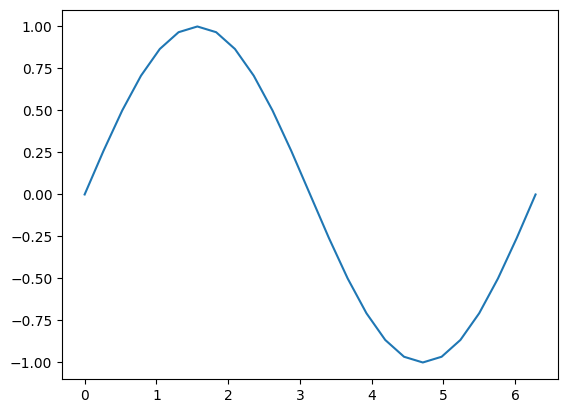

In [58]:
plt.plot(a.detach().numpy(), b.detach().numpy())

In [60]:
loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [68]:
device = torch.device('mps')
run_on_gpu = False
if torch.backends.mps.is_available():
    device = torch.device('mps')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_device=device) as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::mul        50.57%       1.610ms        50.57%       1.610ms       1.610us          1000  
    aten::div        49.43%       1.574ms        49.43%       1.574ms       1.574us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 3.184ms



/Users/seanchao/Documents/64G/Deep-Learning-Implementation/venv/lib/python3.9/site-packages/torch/autograd/profiler.py:224: UserWarning: mps doesn't support profile.
  warn(f"{self.use_device} doesn't support profile.")
STAGE:2024-03-12 23:14:20 92483:9556819 ActivityProfilerController.cpp:314] Completed Stage: Warm Up
STAGE:2024-03-12 23:14:20 92483:9556819 ActivityProfilerController.cpp:320] Completed Stage: Collection
STAGE:2024-03-12 23:14:20 92483:9556819 ActivityProfilerController.cpp:324] Completed Stage: Post Processing


In [64]:
torch.autograd.profiler.profile??

Init signature:
torch.autograd.profiler.profile(
    enabled=True,
    *,
    use_cuda=False,
    use_device=None,
    record_shapes=False,
    with_flops=False,
    profile_memory=False,
    with_stack=False,
    with_modules=False,
    use_kineto=False,
    use_cpu=True,
    use_mtia=False,
    experimental_config=None,
)
Source:        
class profile:
    """Context manager that manages autograd profiler state and holds a summary of results.

    Under the hood it just records events of functions being executed in C++ and
    exposes those events to Python. You can wrap any code into it and it will
    only report runtime of PyTorch functions.
    Note: profiler is thread local and is automatically propagated into the async tasks

    Args:
        enabled (bool, optional): Setting this to False makes this context manager a no-op.

        use_cuda (bool, optional): Enables timing of CUDA events as well using the cudaEvent API.
            Adds approximately 4us of overhead to each 

In [69]:
lin = torch.nn.Linear(3, 2)
x = torch.rand(1, 3)
print('Input:')
print(x)

print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

y = lin(x)
print('\n\nOutput:')
print(y)

Input:
tensor([[0.9767, 0.0705, 0.7527]])


Weight and Bias parameters:
Parameter containing:
tensor([[ 0.3027,  0.1451, -0.2872],
        [ 0.1239,  0.5623, -0.4929]], requires_grad=True)
Parameter containing:
tensor([-0.4872, -0.2446], requires_grad=True)


Output:
tensor([[-0.3975, -0.4549]], grad_fn=<AddmmBackward0>)


In [83]:
x = torch.arange(5.0, requires_grad=True)
y = x * x
y.backward(torch.ones(5))
x.grad

tensor([0., 2., 4., 6., 8.])

In [85]:
from torch.distributions import multinomial

In [102]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 2., 3., 1., 1., 3.])

In [109]:
help(torch.utils.data.DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(typing.Generic)
 |  DataLoader(dataset: torch.utils.data.dataset.Dataset[+T_co], batch_size: Optional[int] = 1, shuffle: Optional[bool] = None, sampler: Union[torch.utils.data.sampler.Sampler, Iterable, NoneType] = None, batch_sampler: Union[torch.utils.data.sampler.Sampler[List], Iterable[List], NoneType] = None, num_workers: int = 0, collate_fn: Optional[Callable[[List[~T]], Any]] = None, pin_memory: bool = False, drop_last: bool = False, timeout: float = 0, worker_init_fn: Optional[Callable[[int], NoneType]] = None, multiprocessing_context=None, generator=None, *, prefetch_factor: Optional[int] = None, persistent_workers: bool = False, pin_memory_device: str = '')
 |  
 |  Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process l

In [155]:
batch_size = 256

def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4

train_iter = DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

NameError: name 'mnist_train' is not defined

In [205]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)



In [206]:
X, y = next(iter(train_iter))
X.shape

torch.Size([256, 1, 28, 28])

In [207]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

In [208]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [209]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X, X_prob, X_prob.sum(1)

(tensor([[-0.7452, -0.7427,  0.3504, -0.7824, -0.3125],
         [-0.2213, -1.0032, -1.0029, -0.2385, -0.4128]]),
 tensor([[0.1334, 0.1337, 0.3989, 0.1285, 0.2056],
         [0.2685, 0.1229, 0.1229, 0.2640, 0.2217]]),
 tensor([1.0000, 1.0000]))

In [210]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [211]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [212]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [213]:
-torch.log(torch.tensor(0.1))

tensor(2.3026)

In [214]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [215]:
accuracy(y_hat, y)

1.0

In [216]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [217]:
acc = Accumulator(2)

In [218]:
acc.reset()
print(acc.data)
acc.add(2, 3)
print(acc.data)

[0.0, 0.0]
[2.0, 3.0]


In [219]:
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            print(f"y.numel() = {y.numel()}")
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [220]:
evaluate_accuracy(net, test_iter)

y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 256
y.numel() = 16


0.0151

In [225]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
onehotencoder = OneHotEncoder()
data = np.array([[1, 1, 1, 2, 2, 2, 3, 3, 1, 2]])

data_whole_ohe=onehotencoder.fit_transform(data.reshape(-1, 1)).toarray()

In [226]:
data_whole_ohe

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])